In [132]:
import numpy as np
import pandas as pd

In [133]:
df = pd.read_csv("dataset/nyc-rolling-sales.csv")

In [134]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [135]:
df.shape

(84548, 22)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [137]:
df_not_null = df.drop(["Unnamed: 0", "EASE-MENT"], axis=1)

In [138]:
df_not_null

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [139]:
df["APARTMENT NUMBER"]

0         
1         
2         
3         
4         
        ..
84543     
84544     
84545     
84546     
84547     
Name: APARTMENT NUMBER, Length: 84548, dtype: object

In [140]:
df_not_null_ = df_not_null.drop(["APARTMENT NUMBER"], axis =1)

In [141]:
df_not_null_

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [142]:
df_not_null_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   ZIP CODE                        84548 non-null  int64 
 9   RESIDENTIAL UNITS               84548 non-null  int64 
 10  COMMERCIAL UNITS                84548 non-null  int64 
 11  TOTAL UNITS                     84548 non-null  int64 
 12  LAND SQUARE FEET                84548 non-null

In [143]:
data_cat_obj = [
    "NEIGHBORHOOD", 
    "BUILDING CLASS CATEGORY", 
    "TAX CLASS AT PRESENT",
    "BUILDING CLASS AT PRESENT",
    "ADDRESS",
    "BUILDING CLASS AT TIME OF SALE",
]
for data_group in data_cat_obj:
    df_not_null_[data_group] = df_not_null_[data_group].astype('category')

data_cat_int = [
    "ZIP CODE",
    "SALE PRICE",
    "LAND SQUARE FEET",
    "GROSS SQUARE FEET",
    
]
for data_group in data_cat_int:
    df_not_null_[data_group] = pd.to_numeric(df_not_null_[data_group], errors='coerce')

df_not_null_["BOROUGH"] = df_not_null_["BOROUGH"].astype(str)
df_not_null_["BOROUGH"].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
df_not_null_["SALE DATE"] = pd.to_datetime(df_not_null_["SALE DATE"])

In [144]:
df_not_null_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  category      
 8   ZIP CODE                        84548 non-null  int64         
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

In [145]:
df_not_null_.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [146]:
df_not_null_fix = df_not_null_.replace(0,np.nan)

In [147]:
df_not_null_fix.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                            982
RESIDENTIAL UNITS                 24783
COMMERCIAL UNITS                  79429
TOTAL UNITS                       19762
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        24789
SALE DATE                             0
dtype: int64

In [148]:
df_not_null_fix['RESIDENTIAL UNITS'].fillna(df_not_null_fix['RESIDENTIAL UNITS'].mean(), inplace=True)
df_not_null_fix['COMMERCIAL UNITS'].fillna(df_not_null_fix['COMMERCIAL UNITS'].mean(), inplace=True)
df_not_null_fix['TOTAL UNITS'].fillna(df_not_null_fix['TOTAL UNITS'].mean(), inplace=True)
df_not_null_fix['LAND SQUARE FEET'].fillna(df_not_null_fix['LAND SQUARE FEET'].mean(), inplace=True)
df_not_null_fix['GROSS SQUARE FEET'].fillna(df_not_null_fix['GROSS SQUARE FEET'].mean(), inplace=True)
df_not_null_fix['YEAR BUILT'].fillna(df_not_null_fix['YEAR BUILT'].mean(), inplace=True)
df_not_null_fix['SALE PRICE'].fillna(df_not_null_fix['SALE PRICE'].mean(), inplace=True)

df_not_null_fix['ZIP CODE'].fillna(df_not_null_fix['ZIP CODE'].mode()[0], inplace=True)

In [149]:
df_not_null_fix.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [150]:
df_not_null_fix.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04,8.454800e+04,84548.000000,84548.000000,8.454800e+04
mean,4237.218976,376.224015,10851.785672,2.865088,3.196913,2.935264,4.790159e+03,5.060445e+03,1950.084805,1.657485,1.494927e+06
std,3568.263407,658.136814,562.406128,16.670099,8.679760,18.931873,3.482873e+04,2.870014e+04,32.884737,0.819341,1.036562e+07
min,1.000000,1.000000,10001.000000,1.000000,1.000000,1.000000,2.000000e+00,6.000000e+01,1111.000000,1.000000,1.000000e+00
25%,1322.750000,22.000000,10306.000000,1.000000,3.196913,1.000000,2.483000e+03,1.904000e+03,1925.000000,1.000000,4.700000e+05
50%,3311.000000,50.000000,11209.000000,2.000000,3.196913,2.000000,4.790159e+03,5.060445e+03,1950.000000,2.000000,9.500000e+05
75%,6281.000000,1001.000000,11357.000000,2.865088,3.196913,2.935264,4.790159e+03,5.060445e+03,1965.000000,2.000000,1.494927e+06
max,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [151]:
df_not_null_fix.groupby('BOROUGH').mean()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,,
Bronx,4201.187544,300.252518,10462.759257,4.182499,3.106080,4.211730,5106.406496,6043.417060,1945.177776,1.525606,9.869888e+05
Brooklyn,4313.198653,337.821350,11208.563605,2.688317,3.062234,2.672775,3883.362634,4527.654883,1944.388453,1.661455,1.354017e+06
Manhattan,1108.161750,749.201409,10033.297553,3.760855,3.341693,3.946007,4877.118724,8068.710097,1952.105720,2.130176,2.948627e+06
Queens,6629.870175,229.730476,11364.844592,2.495989,3.252722,2.592668,4448.249492,3929.568352,1949.418582,1.513278,9.741576e+05
Staten Island,3254.757788,203.562782,10308.255172,1.489907,3.165582,1.504972,8015.595167,2807.039585,1968.204554,1.186207,8.148801e+05


In [152]:
df_not_null_fix.groupby('BOROUGH').median()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,,
Bronx,4175.0,47.0,10465.0,2.000000,3.196913,2.000000,2908.000000,3068.000000,1949.000000,1.0,5.200000e+05
Brooklyn,4546.0,50.0,11219.0,2.000000,3.196913,2.000000,2850.000000,3600.000000,1931.000000,1.0,1.300000e+06
Manhattan,1170.0,1004.0,10022.0,2.865088,3.196913,2.935264,4790.159079,5060.445111,1950.084805,2.0,1.494927e+06
Queens,5900.0,40.0,11375.0,2.000000,3.196913,2.000000,4000.000000,2422.000000,1950.000000,1.0,7.450000e+05
Staten Island,3001.0,57.0,10308.0,1.000000,3.196913,1.000000,4000.000000,1800.000000,1973.000000,1.0,5.650000e+05


In [153]:
df_not_null_fix.groupby('BOROUGH').apply(pd.DataFrame.mode).reset_index(drop=True)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Bronx,RIVERDALE,02 TWO FAMILY DWELLINGS,1,3944,1,D4,2287 JOHNSON AVENUE,10462.0,1.000000,3.196913,1.0,4790.159079,5060.445111,1950.084805,1,D4,1.494927e+06,2017-01-18
1,Brooklyn,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,2135,1,R4,429 KENT AVENUE,11201.0,1.000000,3.196913,1.0,4790.159079,5060.445111,1950.084805,1,R4,1.494927e+06,2016-10-06
2,Manhattan,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,16,1,R4,169 WEST 95TH STREET,10023.0,2.865088,3.196913,1.0,4790.159079,5060.445111,1950.084805,2,R4,1.494927e+06,2017-08-07
3,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,A1,131-05 40TH ROAD,11354.0,1.000000,3.196913,1.0,4790.159079,5060.445111,1920.000000,1,A1,1.494927e+06,2016-11-10
4,Staten Island,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,2450,1,A5,1235 FOREST HILL ROAD,10314.0,1.000000,3.196913,1.0,4790.159079,5060.445111,1970.000000,1,A5,1.494927e+06,2017-06-15


In [154]:
df_not_null_fix.groupby('BOROUGH').std()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,,
Bronx,1056.791427,761.974838,16.338695,23.597931,0.750282,23.938752,18359.235917,29398.916631,28.314904,0.836832,2.777187e+06
Brooklyn,2708.182861,533.132291,103.789689,8.476832,1.630396,8.661516,13995.574826,15194.286038,36.441114,0.887896,3.889766e+06
Manhattan,536.097242,880.911627,47.903481,22.133513,6.430878,23.205850,5151.447287,37347.855029,34.657370,0.549082,2.141479e+07
Queens,4330.790455,492.562923,140.212370,18.125203,14.358727,23.267861,37272.847487,34001.914862,27.565299,0.803566,2.708361e+06
Staten Island,2313.599684,430.153538,4.342847,2.301871,1.941718,3.011495,82859.964859,12433.287805,30.354309,0.640193,1.664180e+06


In [155]:
from scipy.stats import norm

In [156]:
data_normal = norm.rvs(df_not_null_fix["YEAR BUILT"])

In [157]:
data_normal

array([1902.11778931, 1899.43094184, 1900.00359347, ..., 1925.04185672,
       2000.20521934, 2006.2954859 ])

In [158]:
import seaborn as sns

C:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Tahun dibangun'), Text(0, 0.5, 'Property')]

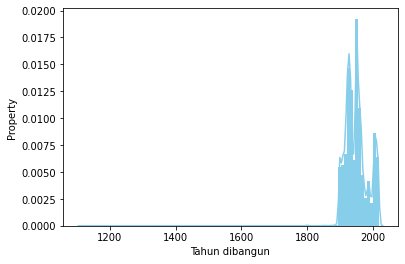

In [159]:
ax = sns.distplot(data_normal,
             bins=100,
             kde=True,
             color='skyblue',
             hist_kws={"linewidth": 15,'alpha':1})
ax.set (xlabel='Tahun dibangun', ylabel='Property')

In [160]:
df_not_null_fix["YEAR BUILT"].value_counts()

1950.084805    6970
1920.000000    6045
1930.000000    5043
1925.000000    4312
1910.000000    3585
               ... 
1888.000000       1
1849.000000       1
1855.000000       1
1111.000000       1
1680.000000       1
Name: YEAR BUILT, Length: 158, dtype: int64

Yang berarti bahwa sebagian besar properti yang dijual atau ditransaksikan dibangun antara tahun 1910 hingga 1950 di mana penjualan properti maksimum pada tahun 1950

In [161]:
df_not_null_fix.groupby('BOROUGH').agg({'SALE PRICE': [np.mean, np.std, np.size]})

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          9.869888e+05  2.777187e+06   7049
Brooklyn       1.354017e+06  3.889766e+06  24047
Manhattan      2.948627e+06  2.141479e+07  18306
Queens         9.741576e+05  2.708361e+06  26736
Staten Island  8.148801e+05  1.664180e+06   8410

In [162]:
mean_borough = 9.869888e+05
sd_borough = 2.777187e+06
n_borough = 7049
z = 1.96 # z-score untuk confidence level 95%

se = sd_borough / np.sqrt(n_borough)

print("Hasil standard error adalah:", se)

Hasil standard error adalah: 33078.16188981693


In [163]:
lcb = mean_borough - z * se
ucb = mean_borough + z * se

print("Hasil Lower limit adalah:", lcb)
print("Hasil Upper limit adalah:", ucb)

Hasil Lower limit adalah: 922155.6026959588
Hasil Upper limit adalah: 1051821.9973040412


Hasil rata-rata penjualan bangunan di Bronx berkisar di harga 922155.6 sampai 1051821.99